HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.

AIM: In this dataset we will try to analyze the factors affecting the attrition and create a best model for predicting the attrition.

In [409]:
#importing all the necssary libreray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings
import warnings
warnings.filterwarnings("ignore")

In [410]:
#loading the dataset
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
#lets see insights of the data sets
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [411]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [412]:
#checking the data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [413]:
#checking the column values
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [414]:
#Checking the shape
df.shape

(1470, 35)

In [415]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [416]:
#cheking the object type and integer type datatype
(df.dtypes==object).value_counts()

False    26
True      9
dtype: int64

In [417]:
#Observation
#There are total 1470 rows and 35 columns
#Out of 35 columns 9 are object type and 26 are integer type

# Summary statistics

In [418]:
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [419]:
#All the coulmns have 1470 values. so thier is no null value.
#traget variable has 2 unique values
#where as attributes like BusinessTravel, Department, EducationField have 3, 3, 6 respectivly
#Most of the columns have nearly same median and mean so chances of skewness is low
#Most of the coulms have high margine between 75% and 100% so chance of outliers are high

In [420]:
#Transforming the catagorical data
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

variable = ['Attrition','BusinessTravel', 'Department',"EducationField" , "Gender","JobRole", "OverTime", "Over18","MaritalStatus" ]
for i in variable:
    df[i] = lb.fit_transform(df[i])

<AxesSubplot:>

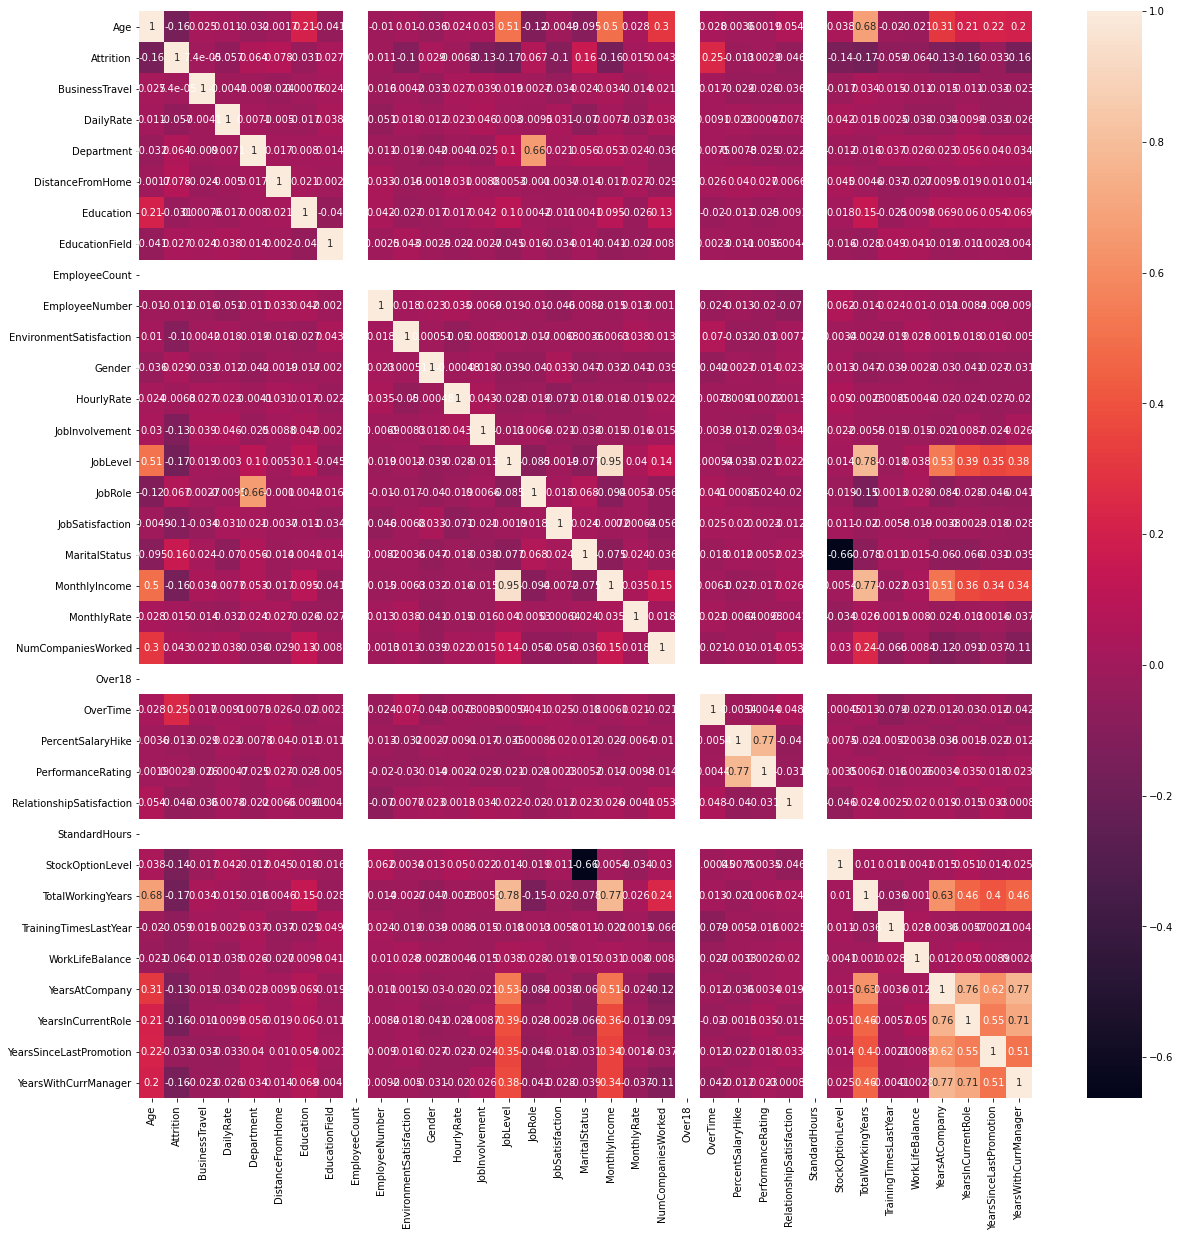

In [421]:
#checking the correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [422]:
#Finding cheking the low corelated coulmn
df.corr()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


<AxesSubplot:>

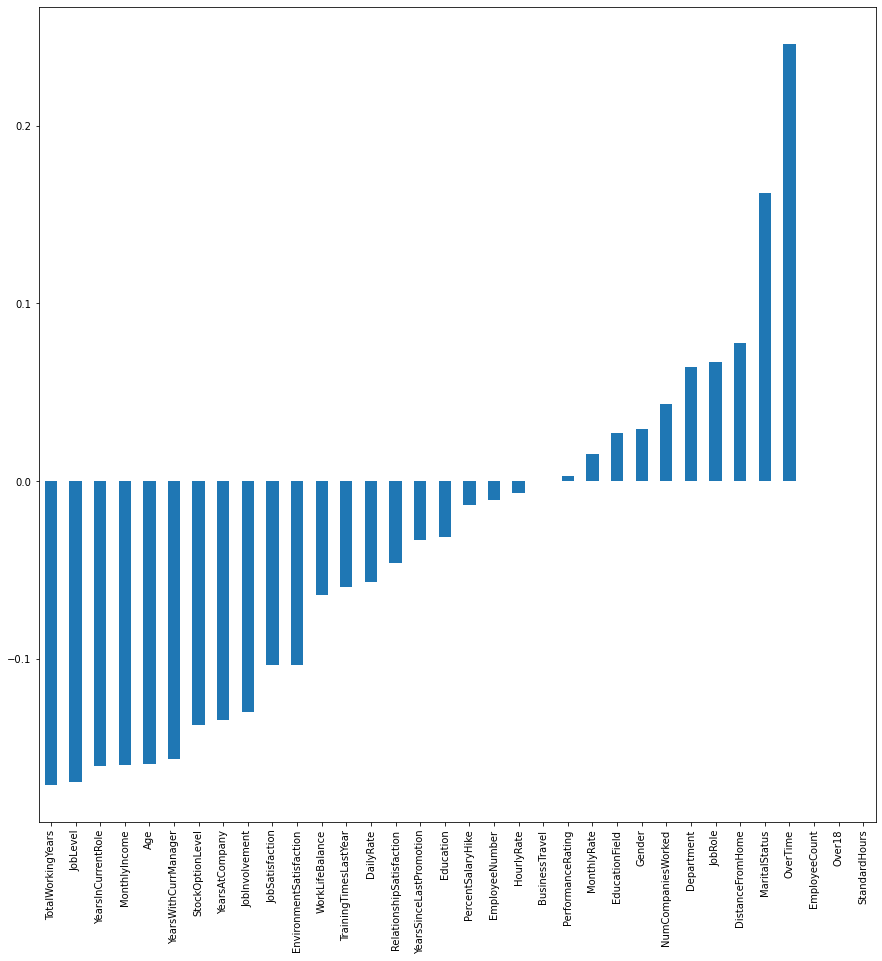

In [423]:
#checking the correlation
plt.figure(figsize=(15,15))

df.corr()['Attrition'].sort_values().drop('Attrition').plot(kind='bar')

In [424]:
# We need to drop the least correlated columns for better analysis
list1=["BusinessTravel","EducationField","EmployeeNumber","HourlyRate","DailyRate", "StockOptionLevel","EnvironmentSatisfaction","JobSatisfaction","PercentSalaryHike","PerformanceRating"] 
df.corr()
for i in list1:
       df.drop(labels=i, axis=1,inplace=True)

In [425]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EmployeeCount,Gender,JobInvolvement,JobLevel,JobRole,...,OverTime,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1,2,1,0,3,2,7,...,1,1,80,8,0,1,6,4,0,5
1,49,0,1,8,1,1,1,2,2,6,...,0,4,80,10,3,3,10,7,1,7
2,37,1,1,2,2,1,1,2,1,2,...,1,2,80,7,3,3,0,0,0,0
3,33,0,1,3,4,1,0,3,1,6,...,1,3,80,8,3,3,8,7,3,0
4,27,0,1,2,1,1,1,3,1,2,...,0,4,80,6,3,3,2,2,2,2


In [426]:
df.columns
#cheking the columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'RelationshipSatisfaction', 'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [427]:
df.dtypes
#all dtypes are converted to int

Age                         int64
Attrition                   int32
Department                  int32
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
Gender                      int32
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
RelationshipSatisfaction    int64
StandardHours               int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [428]:
#There are some colums with single unique values these coulmns also should be removed

#Check for single valued columns
for i in df.columns:
    if df.loc[:,i].nunique()==1:
        print(i)

EmployeeCount
Over18
StandardHours


In [429]:
df.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)
#now data is ready for analysis
#we will start with univarint analysis taking columns which has high correlation with target variable(Attrition)

# Univariant analysis

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64


maximum employess are of age      TotalWorkingYears
10                202
minimum employess are of age      TotalWorkingYears
38                  1




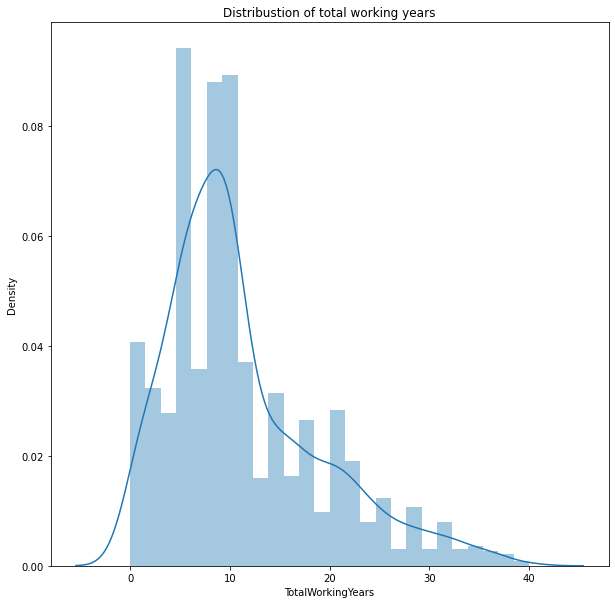

In [430]:
#lets start with the total working years as it is one of the highly corelated
plt.figure(figsize=(10,10))
sns.distplot(df["TotalWorkingYears"])
plt.title("Distribustion of total working years")
print(df["TotalWorkingYears"].describe())
A=pd.DataFrame(df["TotalWorkingYears"].value_counts())

print("\n")
print("maximum employess are of age ",A.iloc[:1,:])
print("minimum employess are of age ",A.iloc[-1:,:])
print("\n")
plt.show()

In [431]:
#grapgh shows that 50% of the employess have with in 10 years of work experince in this company
#employees with 10 years of experince in the company are most(202 employees) and 38 year of experince is least(1 employee)

count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64


maximum employess are of JobLevel     JobLevel
1       543
minimum employess are of JobLevel     JobLevel
5        69




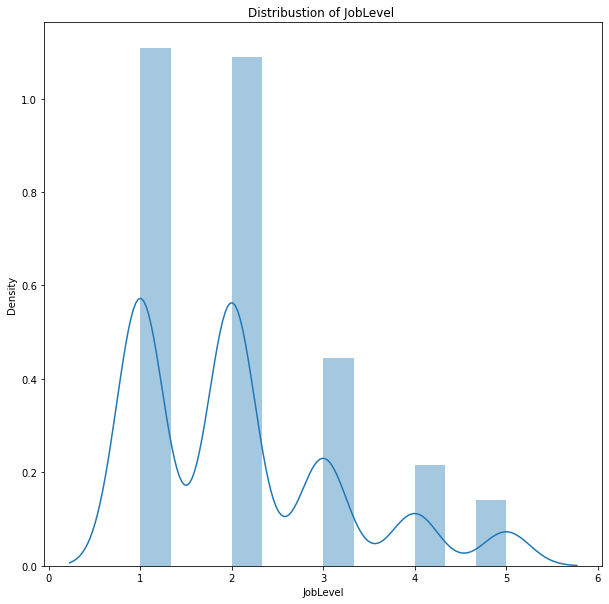

In [432]:
#analysis of job level of an employee
plt.figure(figsize=(10,10))
sns.distplot(df["JobLevel"])
plt.title("Distribustion of JobLevel ")
print(df["JobLevel"].describe())
A=pd.DataFrame(df["JobLevel"].value_counts())

print("\n")
print("maximum employess are of JobLevel ",A.iloc[:1,:])
print("minimum employess are of JobLevel ",A.iloc[-1:,:])
print("\n")
plt.show()

In [433]:
#grapgh shows that 50% of the employess are in lower job level in this company
#employees with job level 1  in the company are most(543 employees) and 5 year of experince is least(69 employee)

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64


average salary of an employee in this company is: 6502.931292517007
Maximum salary in this company is  19999 where as minimum is  1009
About 50% of the employees are getting salary less than 5000rs


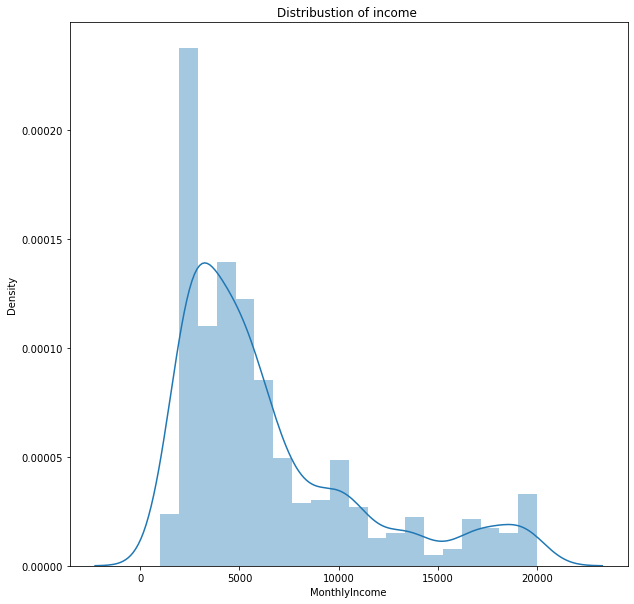

In [434]:
#analysis of Monthly Income of an employee
plt.figure(figsize=(10,10))
sns.distplot(df["MonthlyIncome"])
plt.title("Distribustion of income ")
print(df["MonthlyIncome"].describe())
A=pd.DataFrame(df["MonthlyIncome"].value_counts())
print("\n")
print("average salary of an employee in this company is:", df["MonthlyIncome"].mean())
print("Maximum salary in this company is ",df["MonthlyIncome"].max(),"where as minimum is ",df["MonthlyIncome"].min())
print("About 50% of the employees are getting salary less than 5000rs")

,OverTime
0,1054
1,416


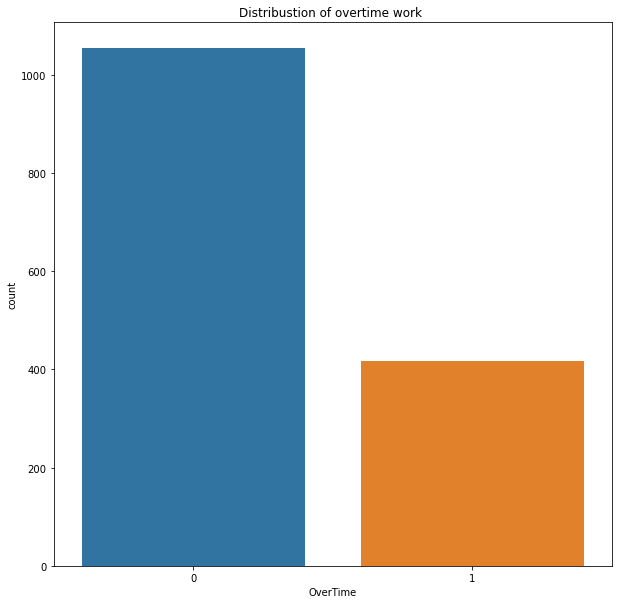

In [435]:
#analysis of overtime work done by employee
plt.figure(figsize=(10,10))
sns.countplot(df["OverTime"])
plt.title("Distribustion of overtime work ")
pd.DataFrame(df["OverTime"].value_counts())

,MaritalStatus
1,673
2,470
0,327


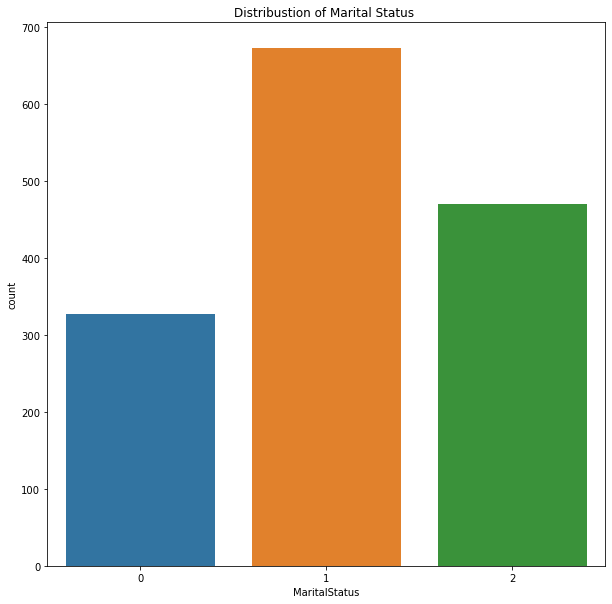

In [436]:
#analysis of overtime work done by employee
plt.figure(figsize=(10,10))
sns.countplot(df["MaritalStatus"])
plt.title("Distribustion of Marital Status ")
pd.DataFrame(df["MaritalStatus"].value_counts())


In [437]:
#From the grapgh we can see that 673 employees are not married(nearly 50%) and 470 is married, 327 is divorced 

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64


maximum employess are  coming from     DistanceFromHome
2               211
minimum employess are comming from      DistanceFromHome
27                12




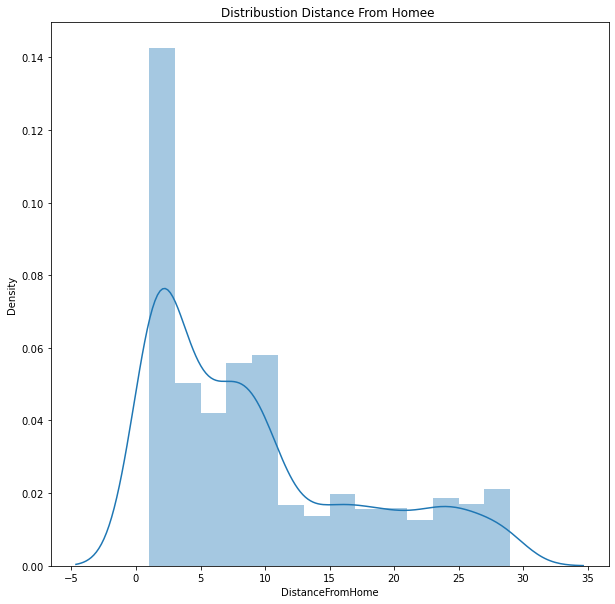

In [438]:
#analysis of Monthly Income of an employee
plt.figure(figsize=(10,10))
sns.distplot(df["DistanceFromHome"])
plt.title("Distribustion Distance From Homee ")
print(df["DistanceFromHome"].describe())
A=pd.DataFrame(df["DistanceFromHome"].value_counts())
A=pd.DataFrame(df["DistanceFromHome"].value_counts())

print("\n")
print("maximum employess are  coming from ",A.iloc[:1,:])
print("minimum employess are comming from ",A.iloc[-1:,:])
print("\n")
plt.show()

In [439]:
#more than 60% of employees are coming from with in 10kmn of office 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'Department'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobRole'}>,
        <AxesSubplot:title={'center':'MaritalStatus'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>],
       [<AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'WorkLifeBalance'}>,
 

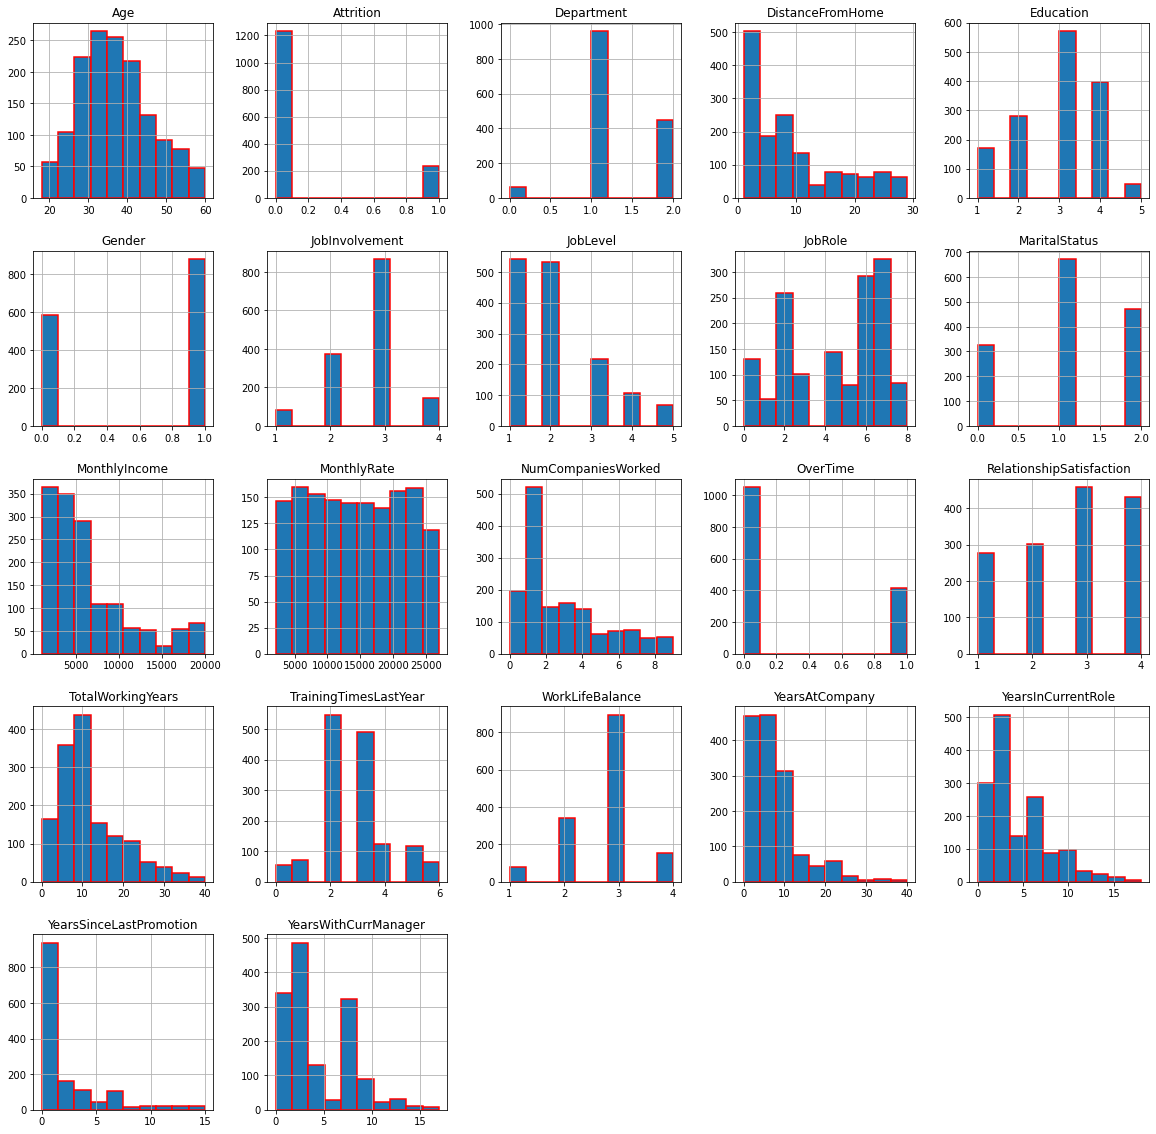

In [440]:
#checking the all the coulumns
df.hist(edgecolor="red",linewidth=1.5,figsize=(20,20))

In [441]:
#Total Observation
#Age:Age is normally distributed
#Attrition: about 16% of the employees leave the company every year
#Department: R&D has most number of employees where as sales has 2nd most
#Education: most peple have education level 3 and eductaion level 5 is least
#Gender: male to female ratio in the company is 4: 3
#Numcompaniesworked: About 50% of the employes worked for less than 2 comapanies
#Yearsincurrentrole: Nearly 50% of the employes are in same role for upto 5 years
#only about 70% of employees are getting promated every year


# Bi-variant analysis

In [442]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,Gender,JobInvolvement,JobLevel,JobRole,MaritalStatus,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1,2,0,3,2,7,2,...,8,1,1,8,0,1,6,4,0,5
1,49,0,1,8,1,1,2,2,6,1,...,1,0,4,10,3,3,10,7,1,7
2,37,1,1,2,2,1,2,1,2,2,...,6,1,2,7,3,3,0,0,0,0
3,33,0,1,3,4,0,3,1,6,1,...,1,1,3,8,3,3,8,7,3,0
4,27,0,1,2,1,1,3,1,2,1,...,9,0,4,6,3,3,2,2,2,2


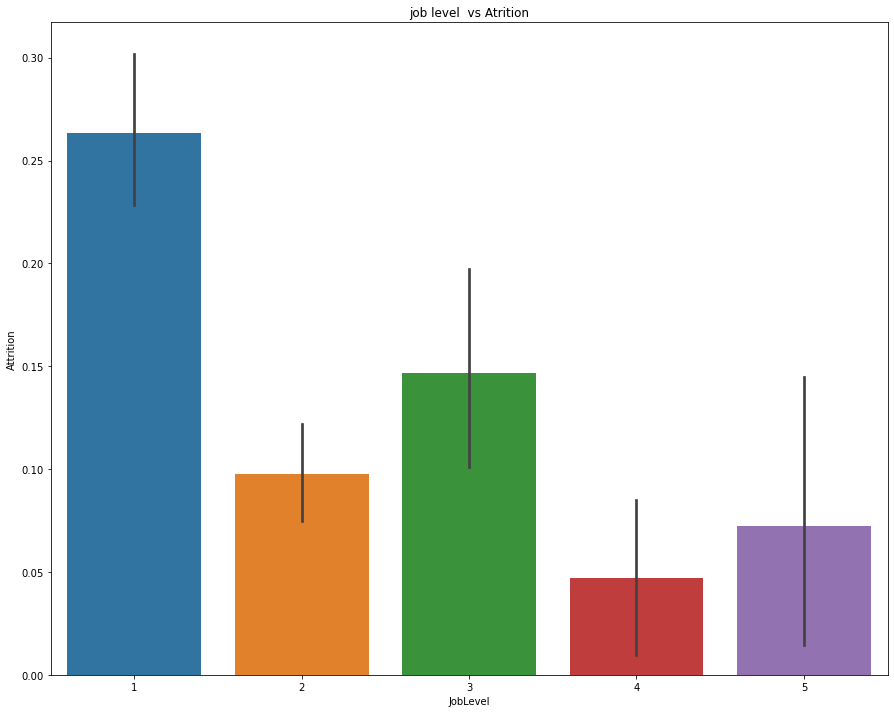

In [443]:
#Analysis of joblevel impact on attrition
plt.figure(figsize=(15,12))
plt.title("job level  vs Atrition")
plt.xlabel("JobLevel")
plt.ylabel("Atrition")
sns.barplot(df["JobLevel"],df["Attrition"])
plt.show()

In [444]:
#posibility attrition in employees having level 1 job is more where as level 4 is less


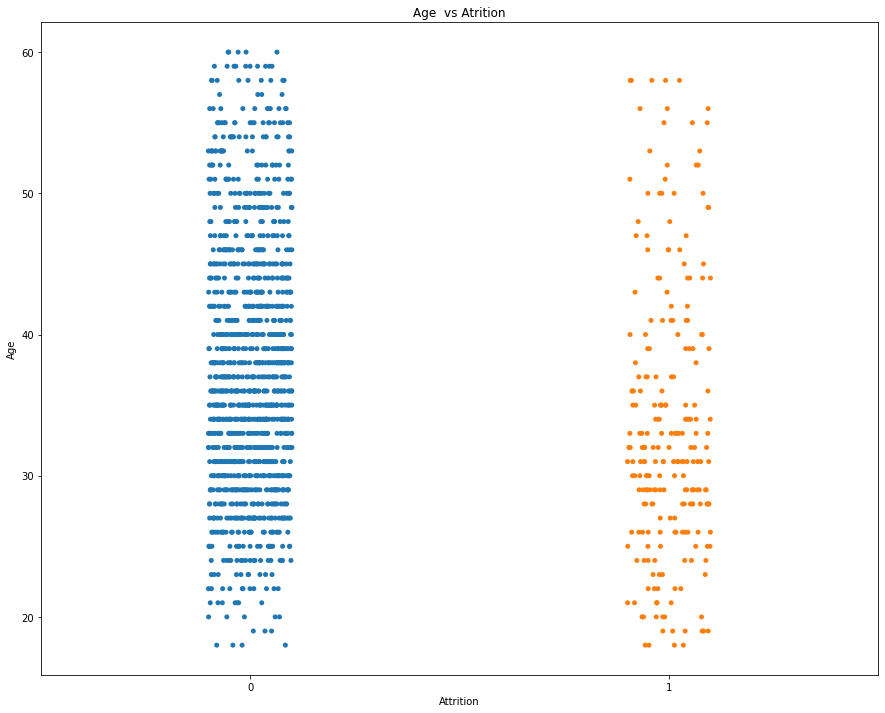

In [445]:
#Analysis of joblevel impact on attrition
plt.figure(figsize=(15,12))
plt.title("Age  vs Atrition")
plt.xlabel("Atrition")
plt.ylabel("Age")
sns.stripplot(df["Attrition"], df["Age"])
plt.show()

In [446]:
#From the plot we can see most of the people who leave the company are below the age 40

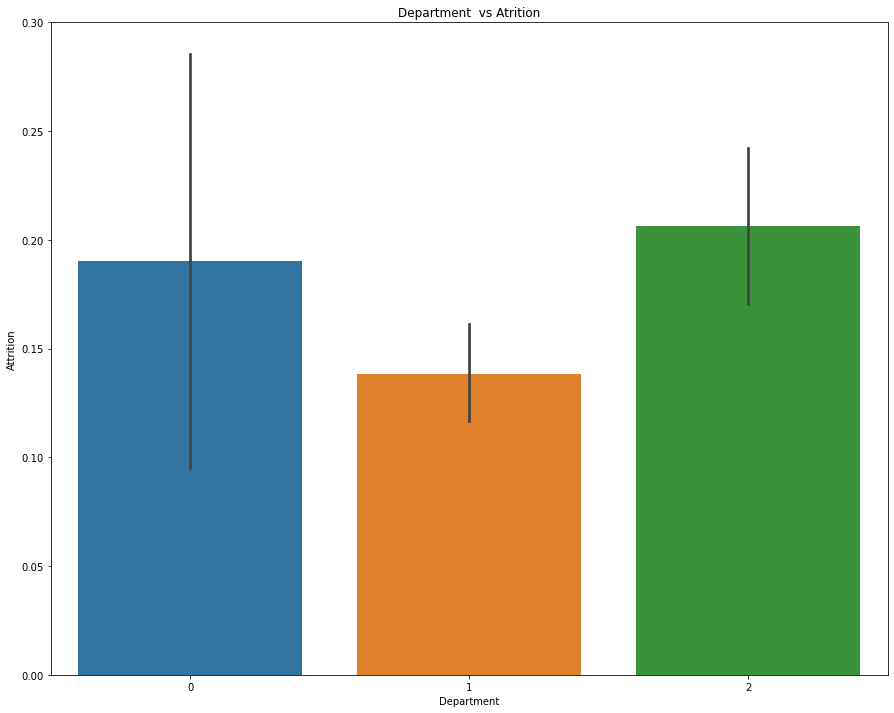

number of employees left each depatment 1    133
2     92
0     12
Name: Department, dtype: int64


In [447]:
#Analysis of department impact on attrition
plt.figure(figsize=(15,12))
plt.title("Department  vs Atrition")
plt.xlabel("Department")
plt.ylabel("Attrition")
sns.barplot(df["Department"],df["Attrition"])
plt.show()
print("number of employees left each depatment",df.query('Attrition==1')["Department"].value_counts())

In [448]:
#So we can see that most of the employee left the companies are from sale department 

<Figure size 1080x864 with 0 Axes>

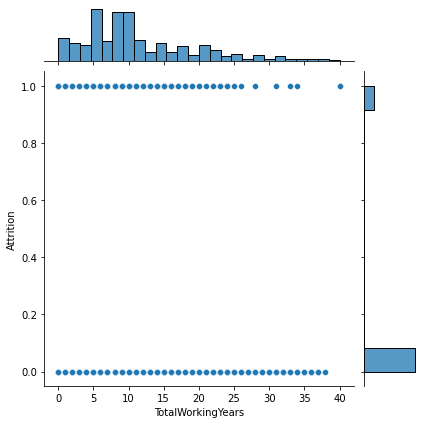

,Attrition
TotalWorkingYears,
0,5
1,40
2,9
3,9
4,12
5,16
6,22
7,18
8,16


In [449]:
#Analysis of Total Working Years impact on attrition
plt.figure(figsize=(15,12))
sns.jointplot(y=df["Attrition"],x=df["TotalWorkingYears"],data=df,kind="scatter")
plt.show()
pd.DataFrame(df.groupby("TotalWorkingYears").sum()["Attrition"])


In [450]:
#Most of the employess who left the job are below 20 years of experince
#people with 1 years of experince leave the company most(40 people)

# Multivariant analysis

In [451]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,Gender,JobInvolvement,JobLevel,JobRole,MaritalStatus,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1,2,0,3,2,7,2,...,8,1,1,8,0,1,6,4,0,5
1,49,0,1,8,1,1,2,2,6,1,...,1,0,4,10,3,3,10,7,1,7
2,37,1,1,2,2,1,2,1,2,2,...,6,1,2,7,3,3,0,0,0,0
3,33,0,1,3,4,0,3,1,6,1,...,1,1,3,8,3,3,8,7,3,0
4,27,0,1,2,1,1,3,1,2,1,...,9,0,4,6,3,3,2,2,2,2


Gender
0     87
1    150
Name: Attrition, dtype: int32

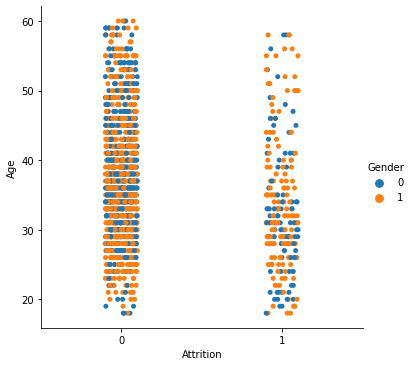

In [452]:
#Analysis of attrition and age for different genders
sns.catplot(x="Attrition",y="Age", hue="Gender",data=df)
df.groupby("Gender").sum()["Attrition"]


In [453]:
#both male and female leave the comapny and most of them are between 28 to 32 years old
#out of total attritions 87 are female(about 36%) and 150 are males(about 63%)

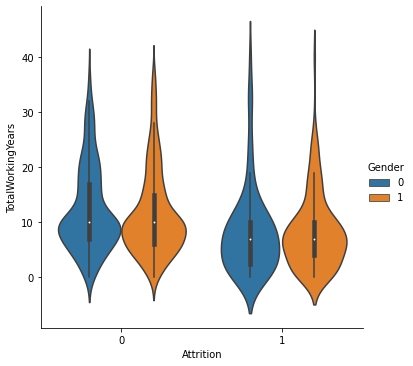

In [454]:
#Analysis of attrition and TotalWorkingYears for different genders
sns.catplot(x="Attrition",y="TotalWorkingYears", hue="Gender",data=df,kind="violin")


In [455]:
#chances number of male employees leaving the company after 30 years is less campared to female


OverTime
0    110
1    127
Name: Attrition, dtype: int32

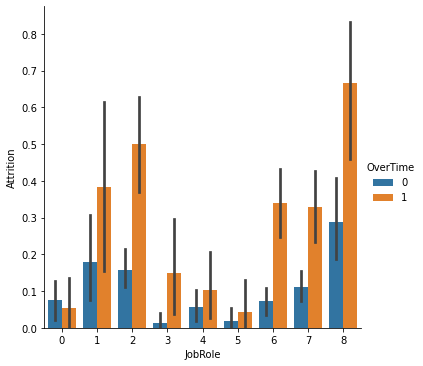

In [456]:
#Analysis of attrition and age for over time
sns.catplot(y="Attrition",x="JobRole", hue="OverTime",data=df,kind="bar")
df.groupby("OverTime").sum()["Attrition"]

In [457]:
#chances of attrition when employee does a over time in job role  8,2,1 high and 5,0,4 is low

OverTime
0    110
1    127
Name: Attrition, dtype: int32

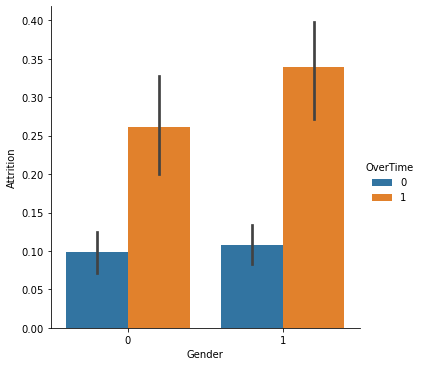

In [458]:
#Analysis of attrition and age for over time
sns.catplot(y="Attrition",x="Gender", hue="OverTime",data=df,kind="bar")
df.groupby("OverTime").sum()["Attrition"]

In [459]:
#Males have more chances of leaving the comapany if he is working over time

Age                            AxesSubplot(0.125,0.657941;0.0824468x0.222059)
Attrition                   AxesSubplot(0.223936,0.657941;0.0824468x0.222059)
Department                  AxesSubplot(0.322872,0.657941;0.0824468x0.222059)
DistanceFromHome            AxesSubplot(0.421809,0.657941;0.0824468x0.222059)
Education                   AxesSubplot(0.520745,0.657941;0.0824468x0.222059)
Gender                      AxesSubplot(0.619681,0.657941;0.0824468x0.222059)
JobInvolvement              AxesSubplot(0.718617,0.657941;0.0824468x0.222059)
JobLevel                    AxesSubplot(0.817553,0.657941;0.0824468x0.222059)
JobRole                        AxesSubplot(0.125,0.391471;0.0824468x0.222059)
MaritalStatus               AxesSubplot(0.223936,0.391471;0.0824468x0.222059)
MonthlyIncome               AxesSubplot(0.322872,0.391471;0.0824468x0.222059)
MonthlyRate                 AxesSubplot(0.421809,0.391471;0.0824468x0.222059)
NumCompaniesWorked          AxesSubplot(0.520745,0.391471;0.0824

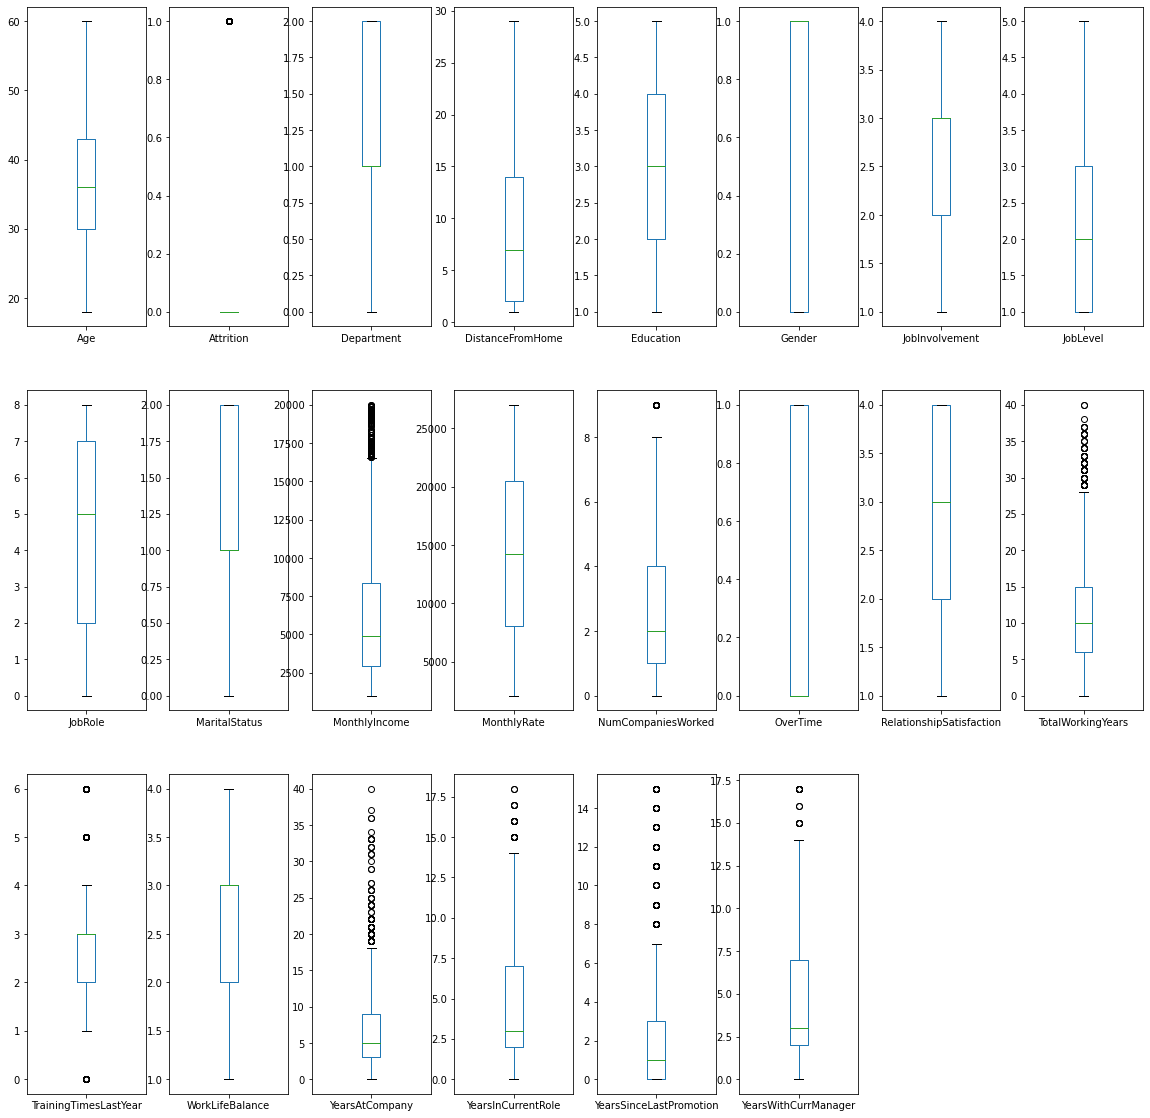

In [460]:
#Cheking the outliers
df.plot(kind="box", subplots=True, layout=(3,8),figsize=(20,20))

In [461]:
#Only few columns have outliers lets check the corelation of those columns
df.corr()

,Age,Attrition,Department,DistanceFromHome,Education,Gender,JobInvolvement,JobLevel,JobRole,MaritalStatus,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,-0.031882,-0.001686,0.208034,-0.036311,0.029820,0.509604,-0.122427,-0.095029,...,0.299635,0.028062,0.053535,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.063991,0.077924,-0.031373,0.029453,-0.130016,-0.169105,0.067151,0.162070,...,0.043494,0.246118,-0.045872,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Department,-0.031882,0.063991,1.000000,0.017225,0.007996,-0.041583,-0.024586,0.101963,0.662431,0.056073,...,-0.035882,0.007481,-0.022414,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,0.017225,1.000000,0.021042,-0.001851,0.008783,0.005303,-0.001015,-0.014437,...,-0.029251,0.025514,0.006557,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.007996,0.021042,1.000000,-0.016547,0.042438,0.101589,0.004236,0.004053,...,0.126317,-0.020322,-0.009118,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
Gender,-0.036311,0.029453,-0.041583,-0.001851,-0.016547,1.000000,0.017960,-0.039403,-0.039723,-0.047183,...,-0.039147,-0.041924,0.022868,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599
JobInvolvement,0.029820,-0.130016,-0.024586,0.008783,0.042438,0.017960,1.000000,-0.012630,0.006616,-0.038497,...,0.015012,-0.003507,0.034297,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.101963,0.005303,0.101589,-0.039403,-0.012630,1.000000,-0.085457,-0.076769,...,0.142501,0.000544,0.021642,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobRole,-0.122427,0.067151,0.662431,-0.001015,0.004236,-0.039723,0.006616,-0.085457,1.000000,0.067957,...,-0.056368,0.040662,-0.020218,-0.145439,0.001342,0.027764,-0.083657,-0.028354,-0.046384,-0.041150
MaritalStatus,-0.095029,0.162070,0.056073,-0.014437,0.004053,-0.047183,-0.038497,-0.076769,0.067957,1.000000,...,-0.035505,-0.017521,0.022549,-0.077886,0.010629,0.014708,-0.059986,-0.065822,-0.030915,-0.038570


In [462]:
#All the columns with outliers have good corelation hence we cannot drop those columns we need to remove the outliers

0.4132863018563338


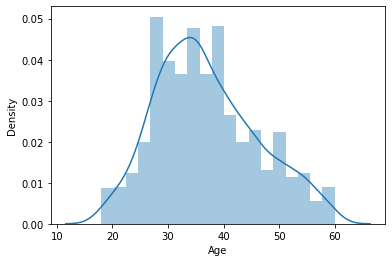

1.8443661240010911


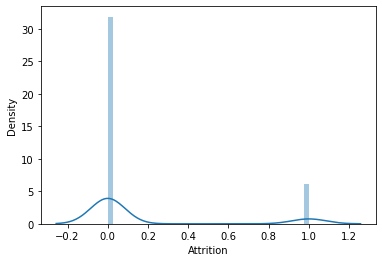

0.1722308111183741


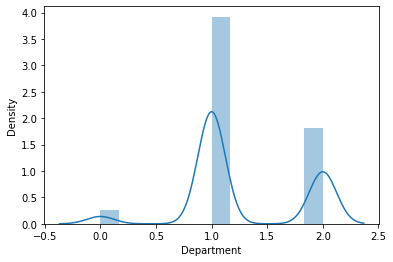

0.9581179956568269


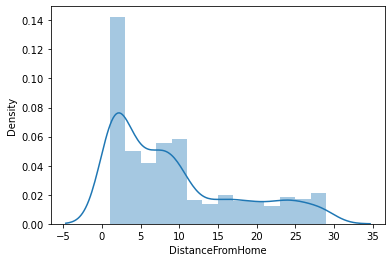

-0.2896810819684331


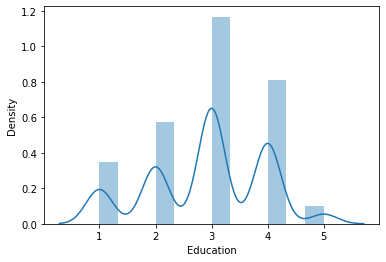

-0.4086654142437622


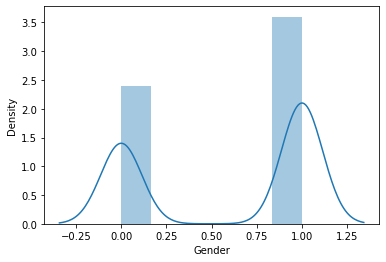

-0.4984193640419493


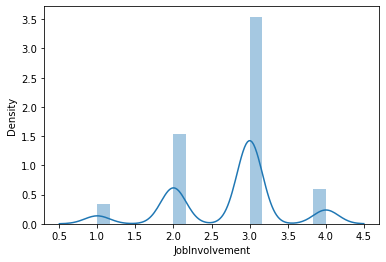

1.0254012829518246


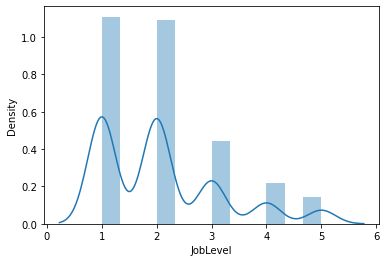

-0.3572699195636241


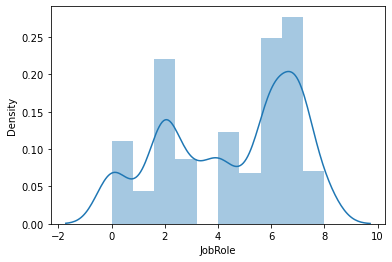

-0.1521746207726309


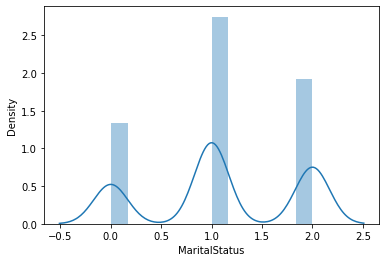

1.3698166808390662


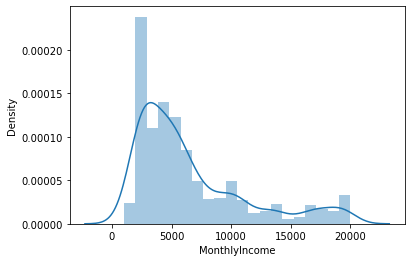

0.018577807891132458


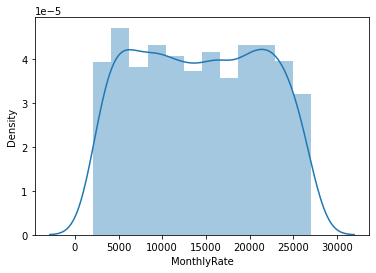

1.026471111968205


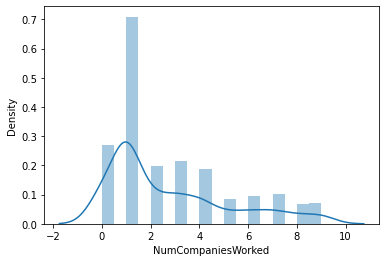

0.9644888640425097


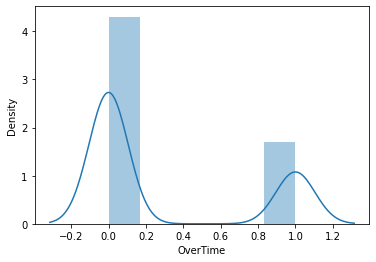

-0.30282756517072296


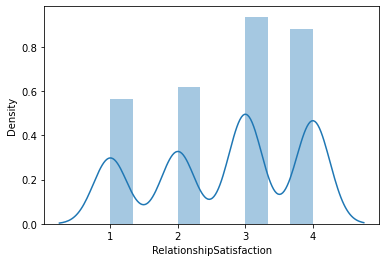

1.1171718528128527


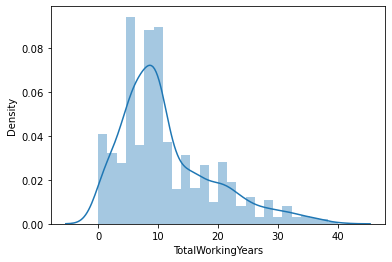

0.5531241710537028


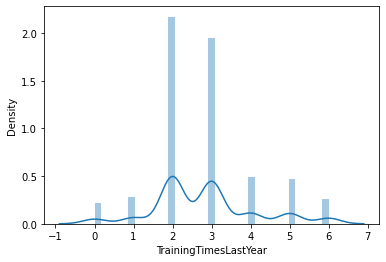

-0.5524802990965146


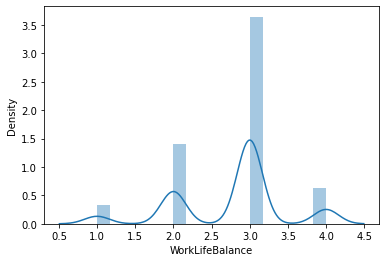

1.7645294543422085


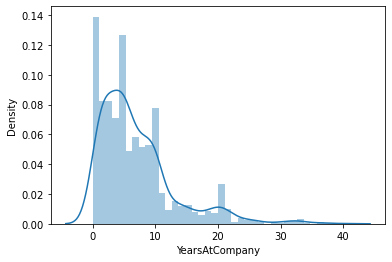

0.9173631562908262


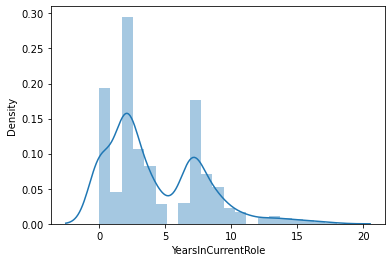

1.9842899833524859


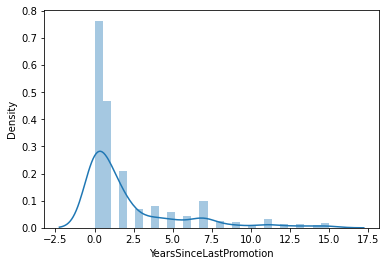

0.8334509919918475


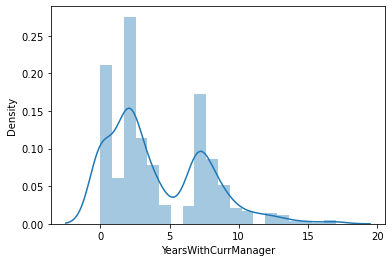

In [463]:
#Cheking skewness

for i in df.columns:
    sns.distplot(df[i])
    print(df[i].skew())
    plt.show()
    

In [464]:
#skew ness is present in some of the columns which is need to be removed

# DATA cleaning and Transfomation

In [465]:
#removing the outliers
print(df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df))
z

(1470, 22)


array([[0.4463504 , 2.28090588, 1.40151234, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [1.32236521, 0.4384223 , 0.49381714, ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.008343  , 2.28090588, 0.49381714, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [1.08667552, 0.4384223 , 0.49381714, ..., 0.61549158, 0.67914568,
        0.31487349],
       [1.32236521, 0.4384223 , 1.40151234, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.32016256, 0.4384223 , 0.49381714, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [466]:
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)
percentage_ofouliers=((1470-1387)/1470)*100

print("using z score percentage of outlier removed:",percentage_ofouliers)

(1387, 22)
using z score percentage of outlier removed: 5.646258503401361


In [467]:
df_new.skew()

Age                         0.472280
Attrition                   1.805983
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
Gender                     -0.417296
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
RelationshipSatisfaction   -0.295686
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

In [468]:
#standardizing the values
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
print(sl.fit(df_new))


StandardScaler()


In [469]:
#atrributes and tartget variables
x=df_new.drop(labels="Attrition",axis=1)
y=df_new["Attrition"]

In [470]:
#removing the skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method=("yeo-johnson"))
x=pd.DataFrame(x)
x.skew()

0    -0.004079
1     0.015095
2    -0.008149
3    -0.103747
4    -0.417296
5    -0.018801
6     0.110769
7    -0.337641
8    -0.158253
9     0.027700
10   -0.176560
11    0.016175
12    0.954751
13   -0.191406
14   -0.009666
15    0.057949
16   -0.011133
17   -0.025230
18   -0.069631
19    0.212301
20   -0.070570
dtype: float64

# Model Fitting

In [486]:
#model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [472]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(42,105):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        accuracyscore=accuracy_score(y_test,predict)
        if accuracyscore>max_score:
            max_score=accuracyscore
            max_state=i
    print("Max score is {} with random state {}".format(max_score,max_state))

In [473]:
model_select(SVC)

Max score is 0.8733624454148472 with random state 51


In [474]:
model_select(LogisticRegression)

Max score is 0.8864628820960698 with random state 49


In [475]:
model_select(GaussianNB)

Max score is 0.8296943231441049 with random state 57


In [476]:
model_select(RandomForestClassifier)

Max score is 0.8755458515283843 with random state 49


In [477]:
model_select(KNeighborsClassifier)

Max score is 0.87117903930131 with random state 51


In [478]:
model_select(DecisionTreeClassifier)

Max score is 0.8122270742358079 with random state 42


In [479]:
model_select(AdaBoostClassifier)

Max score is 0.8842794759825328 with random state 99


In [480]:
#From the above model training we can see logistic regressor performs best(88.64%) at random state 49 lets proceed with these values

In [481]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=49)
print(x_train.shape, x_test.shape)

(929, 21) (458, 21)


In [482]:
cross_val_score(LogisticRegression(),x_train,y_train,cv=5).mean()

0.8449985469340309

In [483]:
#CV score and accuracy score is nearly same..will go for optimization for better accuracy

In [488]:
#parameter tuning
lg = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_cv = GridSearchCV(estimator=lg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

grid_cv = grid_cv.fit(x_train,y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


LogisticRegression(C=0.1, solver='newton-cg')

In [489]:
#lets run with best estimated values
lg= grid_cv.best_estimator_

In [491]:
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("confusion matrix",confusion_matrix(y_test,pred_lg ))
print("\n")
print("classificationreport", classification_report(y_test,pred_lg))
print("accuracy score",accuracy_score(y_test,pred_lg))

confusion matrix [[382   7]
 [ 47  22]]


classificationreport               precision    recall  f1-score   support

           0       0.89      0.98      0.93       389
           1       0.76      0.32      0.45        69

    accuracy                           0.88       458
   macro avg       0.82      0.65      0.69       458
weighted avg       0.87      0.88      0.86       458

accuracy score 0.8820960698689956


<AxesSubplot:>

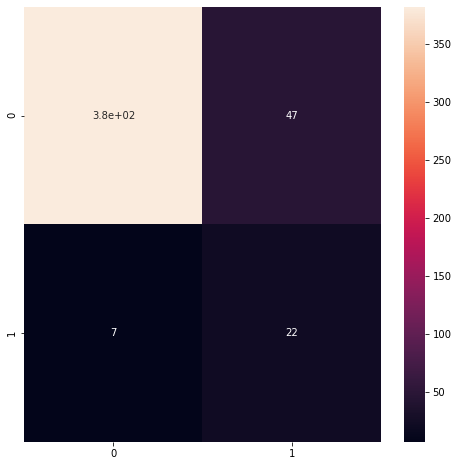

In [493]:
#confusion matrix in heat map
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(pred_lg, y_test), annot=True)

In [498]:
#area under curve and recevieng operating charecteristics

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [495]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [496]:
y_pred_prob

array([0.09861404, 0.01964056, 0.00989302, 0.16904447, 0.46922132,
       0.40935471, 0.08140121, 0.07195623, 0.21787081, 0.18378339,
       0.02235341, 0.33877789, 0.08275575, 0.08160354, 0.01229698,
       0.46735547, 0.03186744, 0.68011768, 0.10282404, 0.08629405,
       0.03815092, 0.07363017, 0.4175586 , 0.04576327, 0.07281124,
       0.40423064, 0.05668531, 0.02496927, 0.46254431, 0.30809149,
       0.03483254, 0.3843983 , 0.15900625, 0.02078025, 0.13287707,
       0.10376326, 0.01049903, 0.61947639, 0.04685751, 0.37490425,
       0.06416133, 0.15575179, 0.17018201, 0.07134635, 0.03482096,
       0.2266844 , 0.01286341, 0.04390959, 0.07627651, 0.04931912,
       0.09937101, 0.19080193, 0.14374483, 0.06619724, 0.01148159,
       0.74140937, 0.05364845, 0.01195289, 0.07185973, 0.20105971,
       0.06167731, 0.14371936, 0.19318459, 0.03948083, 0.42303796,
       0.05217808, 0.4775116 , 0.75919563, 0.12053965, 0.20220286,
       0.04001188, 0.07594692, 0.03950173, 0.08623985, 0.01707

In [499]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

In [501]:
print("False positive rate:", fpr)
print("\n")
print("True positive rate:", tpr)
print("\n")
print("Threshold values:", threshold)

False positive rate: [0.         0.         0.         0.00257069 0.00257069 0.00514139
 0.00514139 0.00771208 0.00771208 0.01028278 0.01028278 0.02313625
 0.02313625 0.03341902 0.03341902 0.03598972 0.03598972 0.04113111
 0.04113111 0.04884319 0.04884319 0.05398458 0.05398458 0.06683805
 0.06683805 0.10282776 0.10282776 0.11311054 0.11311054 0.11825193
 0.11825193 0.13367609 0.13367609 0.13624679 0.13624679 0.15167095
 0.15167095 0.17994859 0.17994859 0.18508997 0.18508997 0.22365039
 0.22365039 0.23907455 0.23907455 0.25192802 0.25192802 0.2622108
 0.2622108  0.28534704 0.28534704 0.33419023 0.33419023 0.36503856
 0.36503856 0.46015424 0.46015424 0.5655527  0.5655527  0.59125964
 0.59125964 0.65552699 0.65552699 0.68637532 0.68637532 0.71208226
 0.71208226 0.7840617  0.7840617  0.83033419 0.83033419 0.89203085
 0.89203085 1.        ]


True positive rate: [0.         0.01449275 0.05797101 0.05797101 0.17391304 0.17391304
 0.20289855 0.20289855 0.26086957 0.26086957 0.31884058 0.31884

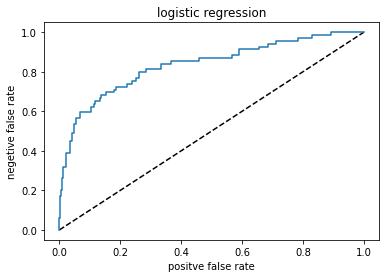

In [502]:
#AUC roc curve graphical representation
plt.plot([0,1],[0,1], "k--")
plt.plot(fpr,tpr)
plt.xlabel("positve false rate")
plt.ylabel("negetive false rate")
plt.title("logistic regression")
plt.show()

In [506]:
#acu_score 
acu_score=roc_auc_score(y_test,y_pred_prob)
acu_score

0.8345069110688872

In [509]:
#Graph shows accuracy with which values predicted by model campared to actual values of y
#now we can find the predict the attrition based on the attribute values with about 84% accuracy
#saving the model

In [510]:
import pickle
filename="HR_analytics.pkl"
pickle.dump(lg,open(filename,"wb"))